<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap03/3_2_Shallow_Networks_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 3.2 -- Shallow neural networks II**

The purpose of this notebook is to gain some familiarity with shallow neural networks with 2D inputs.  It works through an example similar to figure 3.8 and experiments with different activation functions. <br><br>

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


In [9]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [10]:
# Code to draw 2D function -- read it so you know what is going on, but you don't have to change it
def draw_2D_function(ax, x1_mesh, x2_mesh, y):
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = 'hot', vmin=-10,vmax=10.0)
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap='winter')

# Plot the shallow neural network.  We'll assume input in is range [0,10],[0,10] and output [-10,10]
def plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3):

  fig, ax = plt.subplots(3,3)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
  draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
  draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')
  draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
  draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
  draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')
  draw_2D_function(ax[2,0], x1,x2,w_act_1); ax[2,0].set_title('Weighted Act')
  draw_2D_function(ax[2,1], x1,x2,w_act_2); ax[2,1].set_title('Weighted Act')
  draw_2D_function(ax[2,2], x1,x2,w_act_3); ax[2,2].set_title('Weighted Act')
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y)
  ax.set_title('Network output, $y$')
  ax.set_aspect(1.0)
  plt.show()

In [11]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [12]:
# Define a shallow neural network with, two input, one output, and three hidden units
def shallow_2_1_3(x1,x2, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11,\
                  theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):
  pre_1 = theta_10 + (theta_11 * x1) + (theta_12 * x2)
  pre_2 = theta_20 + (theta_21 * x1) + (theta_22 * x2)
  pre_3 = theta_30 + (theta_31 * x1) + (theta_32 * x2)

  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

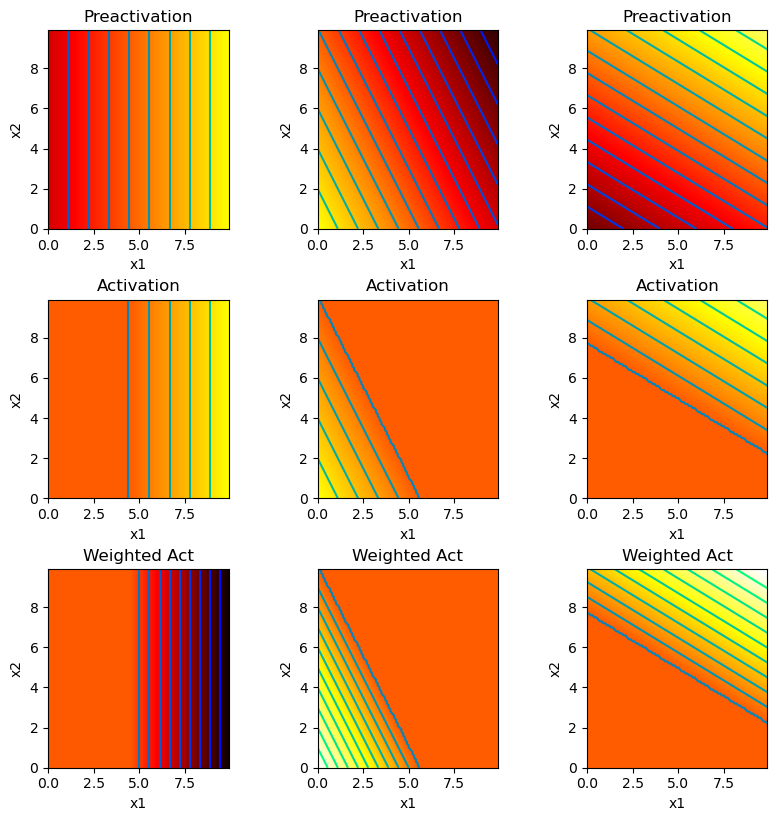

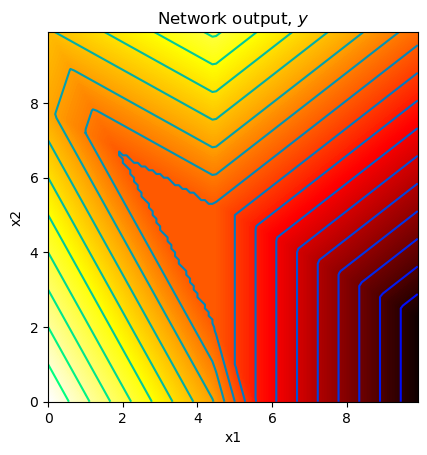

In [13]:
# Now lets define some parameters and run the neural network
theta_10 =  -4.0 ;  theta_11 = 0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -7  ; theta_31 = 0.5; theta_32 = 0.9
phi_0 = 0.0; phi_1 = -2.0; phi_2 = 2.0; phi_3 = 1.5

x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_2_1_3(x1,x2, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
# And then plot it
plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3)

How many different linear polytopes are made by this model?  Identify each in the network output.

There should be 7 linear polytopes

Now we'll extend this model to have two outputs $y_1$ and $y_2$, each of which can be visualized with a separate heatmap.  You will now have sets of parameters $\phi_{10}, \phi_{11}, \phi_{12}, \phi_{13}$ and $\phi_{20}, \phi_{21}, \phi_{22}, \phi_{23}$ that correspond to each of these outputs.

In [14]:
# Plot the shallow neural network.  We'll assume input in is range [0,10],[0,10] and output [-10,10]
def plot_neural_2_inputs_2_outputs(x1,x2, y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23):

  # Plot intermediate plots if flag set
  fig, ax = plt.subplots(4,3)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
  draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
  draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')
  draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
  draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
  draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')
  draw_2D_function(ax[2,0], x1,x2,w_act_11); ax[2,0].set_title('Weighted Act 1')
  draw_2D_function(ax[2,1], x1,x2,w_act_12); ax[2,1].set_title('Weighted Act 1')
  draw_2D_function(ax[2,2], x1,x2,w_act_13); ax[2,2].set_title('Weighted Act 1')
  draw_2D_function(ax[3,0], x1,x2,w_act_21); ax[3,0].set_title('Weighted Act 2')
  draw_2D_function(ax[3,1], x1,x2,w_act_22); ax[3,1].set_title('Weighted Act 2')
  draw_2D_function(ax[3,2], x1,x2,w_act_23); ax[3,2].set_title('Weighted Act 2')
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y1)
  ax.set_title('Network output, $y_1$')
  ax.set_aspect(1.0)
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y2)
  ax.set_title('Network output, $y_2$')
  ax.set_aspect(1.0)
  plt.show()

In [15]:

# Define a shallow neural network with, two inputs, two outputs, and three hidden units
def shallow_2_2_3(x1,x2, activation_fn, phi_10,phi_11,phi_12,phi_13, phi_20,phi_21,phi_22,phi_23, theta_10, theta_11,\
                  theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):

  pre_1 = theta_10 + (theta_11 * x1) + (theta_12 * x2)
  pre_2 = theta_20 + (theta_21 * x1) + (theta_22 * x2)
  pre_3 = theta_30 + (theta_31 * x1) + (theta_32 * x2)
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)
  w_act_11 = phi_11 * act_1
  w_act_12 = phi_12 * act_2
  w_act_13 = phi_13 * act_3
  w_act_21 = phi_21 * act_1
  w_act_22 = phi_22 * act_2
  w_act_23 = phi_23 * act_3
  y1 = phi_10 + w_act_11 + w_act_12 + w_act_13
  y2 = phi_20 + w_act_21 + w_act_22 + w_act_23

  # Return everything we have calculated
  return y1,y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23


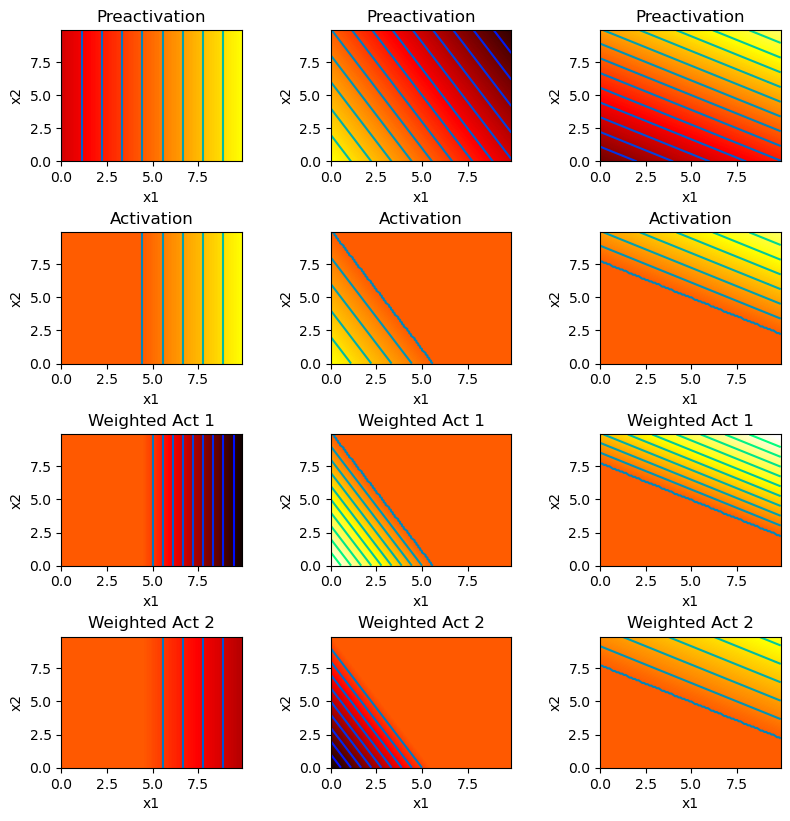

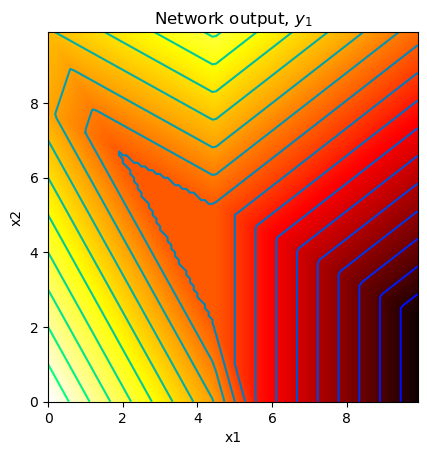

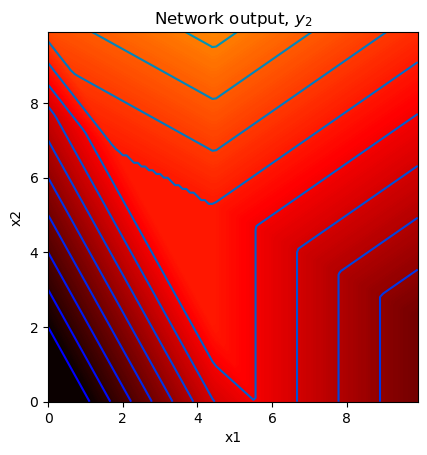

In [16]:
# Now lets define some parameters and run the neural network
theta_10 =  -4.0 ;  theta_11 = 0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -7  ; theta_31 = 0.5; theta_32 = 0.9
phi_10 = 0.0; phi_11 = -2.0; phi_12 = 2.0; phi_13 = 1.5
phi_20 = -2.0; phi_21 = -1.0; phi_22 = -2.0; phi_23 = 0.8

x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# We run the neural network for each of these input values
y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23 = \
    shallow_2_2_3(x1,x2, ReLU, phi_10,phi_11,phi_12,phi_13, phi_20,phi_21,phi_22,phi_23, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
# And then plot it
plot_neural_2_inputs_2_outputs(x1,x2, y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23)